# **K-Means Clustering**

Task yang dilakukan adalah mengelompokkan data rumah berdasarkan lokasi menggunakan atribut longitude dan latitude. K-Mean dipilih sebagai metode dalam task ini.

## **Import library**

In [0]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

## **Load Data**

In [2]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2020-03-23 23:09:20--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.03s   

2020-03-23 23:09:20 (10.5 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



In [0]:
df = pd.read_csv("kc_house_data.csv")

## **Preprocessing**

Pada tahap ini dilakukan pengambilan atribut yang akan digunakan pada clustering, yaitu longitude dan latitude.

In [0]:
data = (df[["lat", "long"]])

In [0]:
X = data.iloc[:, [0, 1]].values

In [6]:
X

array([[  47.5112, -122.257 ],
       [  47.721 , -122.319 ],
       [  47.7379, -122.233 ],
       ...,
       [  47.5281, -122.388 ],
       [  47.7528, -122.119 ],
       [  47.6838, -122.3   ]])

In [0]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2

## **K-Mean**

Inisialisasi jumlah iterasi dan jumlah cluster.

In [0]:
n_iter=100
K=5

Inisialisasi centroid

In [0]:
Centroids=np.array([]).reshape(n,0)

In [0]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

Menghitung Eucledian Distance

In [0]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

Proses clustering

In [0]:
Output={}

In [0]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [0]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

Gambar di bawah merupakan representasi dari data yang belum dicluster.

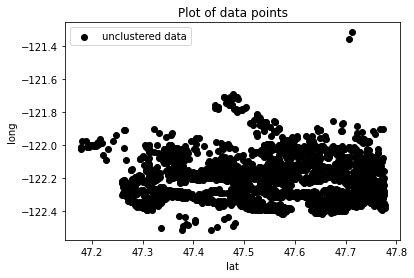

In [15]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('lat')
plt.ylabel('long')
plt.legend()
plt.title('Plot of data points')
plt.show()

Gambar di bawah merupakan representasi dari data yang sudah dicluster.

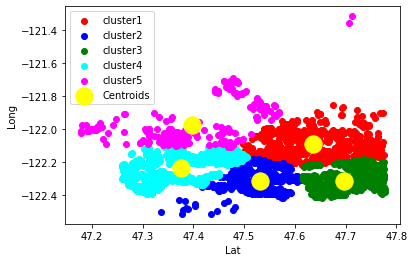

In [16]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3', 'cluster4', 'cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Lat')
plt.ylabel('Long')
plt.legend()
plt.show()

## **Elbow Method**

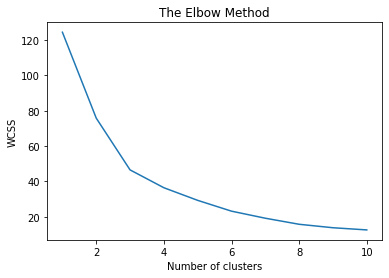

In [17]:
#lets implement the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **Silhouette Score**

Number Of Clusters:
2
Silhouette score value
0.8363950604874151
Number Of Clusters:
3
Silhouette score value
0.9275025552824714
Number Of Clusters:
4
Silhouette score value
0.6331927624045462
Number Of Clusters:
5
Silhouette score value
0.4402370990862806
Number Of Clusters:
6
Silhouette score value
0.4424940974817207
Number Of Clusters:
7
Silhouette score value
0.44379194834953467
Number Of Clusters:
8
Silhouette score value
0.4550254526724329
Number Of Clusters:
9
Silhouette score value
0.3357191755180358
Number Of Clusters:
10
Silhouette score value
0.34718734475025365
Number Of Clusters:
11
Silhouette score value
0.34822947765946355
Number Of Clusters:
12
Silhouette score value
0.3325137431681386
Number Of Clusters:
13
Silhouette score value
0.3192780906780804
Number Of Clusters:
14
Silhouette score value
0.3232185388552096
Number Of Clusters:
15
Silhouette score value
0.3404901860219439
Number Of Clusters:
16
Silhouette score value
0.33282393873845545
Number Of Clusters:
17
Silhou

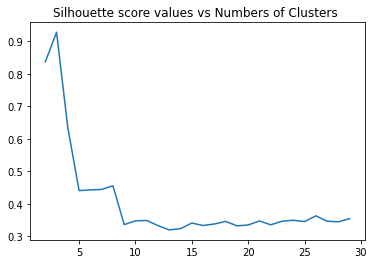

Optimal number of components is:
3


In [19]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()

NumberOfClusters=range(2,30)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

In [20]:

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = K).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))
sil

[0.38586667293126725,
 0.3852142933605929,
 0.38651940687108327,
 0.38534741540247114,
 0.3865600788372062,
 0.3858525094334466,
 0.3852142933605929,
 0.3853535115850524,
 0.38515052555672097]